In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the training dataset

train_data = pd.read_table("thrombin.data",sep=",")


In [3]:
# train_data.describe

#type(train_data)
train_data.shape

(1908, 139352)

In [4]:
# Read the Test dataset

test_data = pd.read_table("Thrombin.testset.data",sep=",")

In [5]:
test_data.shape

(633, 139352)

In [6]:
# Checking for null values in the data frame

train_data.isnull().values.any(axis = 1).sum()
test_data.isnull().values.any(axis = 1).sum()



0

In [7]:
features = []

for i in range(0,139352):
    i = str(i)
    features.append('f'+i)
#print(features)

features[0] = 'activity'

print(features[0])

activity


In [8]:
# Assigning the features to the Train dataframe

train_data.columns = features
test_data.columns = features



In [9]:
train_data.describe

<bound method NDFrame.describe of      activity  f1  f2  f3  f4  f5  f6  f7  f8  f9   ...     f139342  f139343  \
0           I   0   0   0   0   0   0   0   0   0   ...           0        0   
1           I   0   0   0   0   0   0   0   0   0   ...           0        0   
2           I   0   0   0   0   0   0   0   0   0   ...           0        0   
3           I   0   0   0   0   0   0   0   0   0   ...           0        0   
4           I   0   0   0   0   0   0   0   0   0   ...           0        0   
5           I   0   0   0   0   0   0   0   0   0   ...           0        0   
6           I   0   0   0   0   0   0   0   0   0   ...           0        0   
7           I   0   0   0   0   0   0   0   0   0   ...           0        0   
8           I   0   0   0   0   0   0   0   0   0   ...           0        0   
9           I   0   0   0   0   0   0   0   0   0   ...           0        0   
10          I   0   0   0   0   0   0   0   0   0   ...           0        0   
11    

In [10]:
test_data.describe
# test_data.dtypes

<bound method NDFrame.describe of     activity  f1  f2  f3  f4  f5  f6  f7  f8  f9   ...     f139342  f139343  \
0          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
1          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
2          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
3          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
4          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
5          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
6          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
7          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
8          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
9          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
10         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
11         ?   0  

In [11]:
test_data.replace("?","NA")

,activity,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f139342,f139343,f139344,f139345,f139346,f139347,f139348,f139349,f139350,f139351
0,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Replacing the NA values

# from sklearn.preprocessing import Imputer

test_data.fillna(test_data.median(),inplace=True)


,activity,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f139342,f139343,f139344,f139345,f139346,f139347,f139348,f139349,f139350,f139351
0,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# test_data.drop('?',axis=1)
test_data.drop(['activity'],axis =1,inplace = True)

In [14]:
test_data.describe

<bound method NDFrame.describe of      f1  f2  f3  f4  f5  f6  f7  f8  f9  f10   ...     f139342  f139343  \
0     0   0   0   0   0   0   0   0   0    0   ...           0        0   
1     0   0   0   0   0   0   0   0   0    0   ...           0        0   
2     0   0   0   0   0   0   0   0   0    0   ...           0        0   
3     0   0   0   0   0   0   0   0   0    0   ...           0        0   
4     0   0   0   0   0   0   0   0   0    0   ...           0        0   
5     0   0   0   0   0   0   0   0   0    0   ...           0        0   
6     0   0   0   0   0   0   0   0   0    0   ...           0        0   
7     0   0   0   0   0   0   0   0   0    0   ...           0        0   
8     0   0   0   0   0   0   0   0   0    0   ...           0        0   
9     0   0   0   0   0   0   0   0   0    0   ...           0        0   
10    0   0   0   0   0   0   0   0   0    0   ...           0        0   
11    0   0   0   0   0   0   0   0   0    0   ...           0    

In [15]:
# Define X and Y

X = train_data.iloc[:,:-1]
Y = train_data.activity

In [16]:
# Test train and validation split

from sklearn.model_selection import train_test_split

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state=1)

# X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.30,random_state=1)

X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.30,random_state=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002140E8FD160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002140E821CC0>], dtype=object)

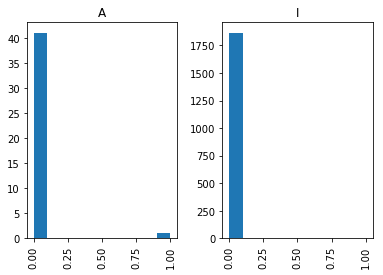

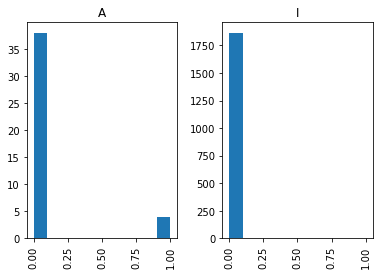

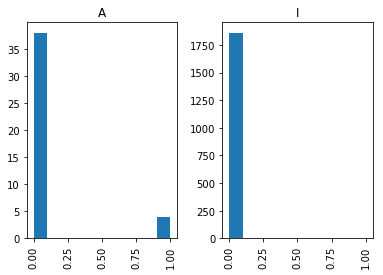

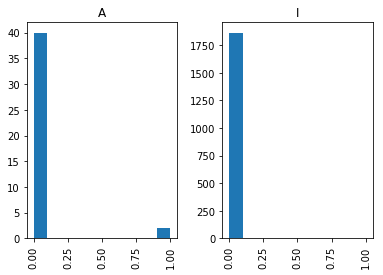

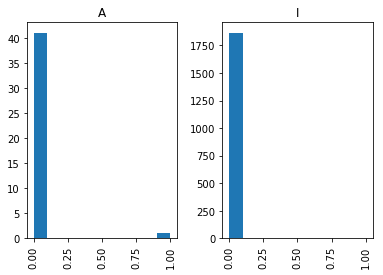

In [36]:
# Statitical plots

# %matplotlib inline

train_data['f1'].hist(by=train_data['activity'])
train_data['f2'].hist(by=train_data['activity'])
train_data['f3'].hist(by=train_data['activity'])
train_data['f4'].hist(by=train_data['activity'])
train_data['f5'].hist(by=train_data['activity'])




In [17]:
X_val.shape

(573, 139351)

In [18]:
# Applying PCA on the Test set

from sklearn import decomposition
from sklearn.decomposition import PCA

PCA = PCA(n_components = 1000)

X = test_data

X_new = PCA.fit(X)


In [19]:
# Verifying the PCA components

X_new.n_components_

1000

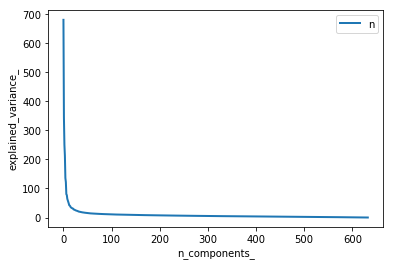

In [20]:
# PCA Plots

plt.plot(PCA.explained_variance_,linewidth = 2)
plt.xlabel('n_components_')
plt.ylabel('explained_variance_')
plt.legend('n_components')
plt.show()



In [21]:
Y_train.describe

<bound method NDFrame.describe of 198     I
460     I
159     I
961     I
1641    A
1194    I
1589    A
83      I
628     I
1386    I
1457    I
948     I
427     I
289     I
529     I
1821    I
683     I
1340    I
401     I
154     I
1395    I
1213    I
295     I
1570    I
1274    I
1587    I
1000    I
1767    I
1071    I
1227    I
       ..
1239    I
580     I
562     I
398     I
668     I
1514    I
252     I
907     I
468     I
914     I
357     I
1278    I
1300    I
1202    A
1305    I
1414    I
508     I
749     I
1607    I
129     I
144     I
960     I
847     I
1669    I
715     I
905     I
1791    I
1096    I
235     I
1061    I
Name: activity, Length: 1335, dtype: object>

In [26]:
X_train.drop(['activity'],axis =1, inplace = True)



X = X_train
Y = Y_train

#print(X_train)

#X_train.describe


In [27]:
# Building a linear SVM Model

from sklearn import svm

C=0.0001

SVM_model = svm.SVC(kernel='linear', C=C)

SVM_model.fit(X,Y)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
print(SVM_model.score(X,Y))


0.987265917603


In [29]:
Y_test.describe

<bound method NDFrame.describe of 1263    I
137     I
1850    I
267     I
186     I
1606    I
1287    I
1708    I
1388    I
382     I
661     I
1089    I
1733    I
1729    I
1686    I
1079    I
880     I
1624    I
893     I
1272    I
1296    I
302     I
1893    I
1097    I
1237    I
336     I
1344    I
940     I
194     I
47      I
       ..
1159    I
45      I
1409    I
768     I
1658    I
972     I
528     I
1642    I
561     I
481     I
1567    I
1604    I
1454    I
110     I
1078    I
1047    I
1218    I
912     I
640     I
62      I
1238    I
332     I
1       I
1392    I
142     I
1504    I
804     I
1575    I
1090    I
1493    I
Name: activity, Length: 573, dtype: object>

In [30]:
#type(y_train)
#pd.to_numeric(Y_train)

#y_train=pd.factorize(Y_train)
#y_train=np.array(y_train)
#y_train.flatten

Y_train=pd.DataFrame(Y_train)


    

In [31]:
#Y_train.replace('I',0)
#Y_train.replace('A',1)
#list(Y_train)

#Y_train.activity[Y_train.activity=='I'] = 0
#Y_train.activity[Y_train.activity=='A'] = 1

In [33]:
#Y_train=Y_train.values

#type(y_train)
#Y_train.activity[Y_train.activity==0] = 'I'
#Y_train.activity[Y_train.activity==1] = 'A'
Y_test.shape
#y_train = Y_train.astype(int)
#x_train = X_train.astype(int)
#x_train=np.array(x_train)

(573,)

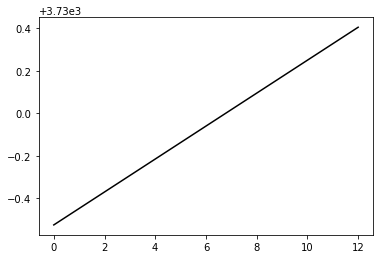

In [34]:
# SVM Plots

w = SVM_model.coef_[0]

# print(w)

a = -w[0]/w[1]

x1 = np.linspace(0,12)
y1 = a*x1 - SVM_model.intercept_[0]/w[1]

h0 = plt.plot(x1,y1,'k-',label='Non weighted div')



C:\Users\suneelnair1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


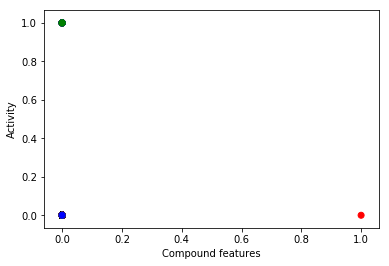

In [35]:
x_train = np.array(X_train)
y_train = np.array(Y_train)

y_train[y_train=='I'] = 0
y_train[y_train=='A'] = 1

N = 10
colors = ['R','G','B']

#plt.scatter(x_train[:,0],x_train[:,1],c = colors)
plt.scatter(x_train[:,0],y_train,c = colors)
plt.xlabel("Compound features")
plt.ylabel("Activity")
plt.legend()
plt.show()

In [36]:
# Predictions

X_test.drop(['activity'],axis =1, inplace = True)

predictions = SVM_model.predict(X_test)


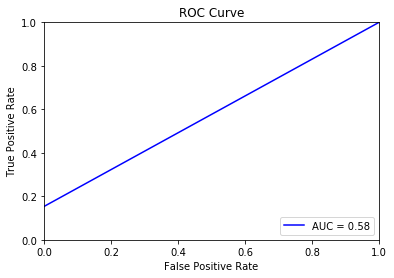

AUC: 0.576923076923


In [37]:
from sklearn import metrics

# ROC Curve

y_test = np.array(Y_test)
y_test[y_test=='I'] = 0
y_test[y_test=='A'] = 1


preds = np.array(predictions)
preds[preds=='I'] = 0
preds[preds=='A'] = 1

fpr,tpr,thresholds = metrics.roc_curve(y_test,preds)
 
roc_auc = metrics.auc(fpr,tpr)
 
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC:',roc_auc)


In [38]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report,confusion_matrix

print('\nClassification Report\n',classification_report(Y_test,predictions))
print('\nConfusion Matrix\n',confusion_matrix(Y_test,predictions))

print('\nAccuracy: ', accuracy_score(Y_test,predictions))


Classification Report
              precision    recall  f1-score   support

          A       1.00      0.15      0.27        13
          I       0.98      1.00      0.99       560

avg / total       0.98      0.98      0.97       573


Confusion Matrix
 [[  2  11]
 [  0 560]]

Accuracy:  0.980802792321


In [39]:
# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train,Y_train)
model_NB.score

C:\Users\suneelnair1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method ClassifierMixin.score of GaussianNB(priors=None)>

In [41]:
# Predictions for Naive Bayes model

predictions_NB = model_NB.predict(X_test)

# Calculating the metrics for the Naive Bayes model

print('\nClassification Report:\n',classification_report(Y_test,predictions_NB))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,predictions_NB))

print('\n Accuracy: ', accuracy_score(Y_test,predictions_NB))


Classification Report:
              precision    recall  f1-score   support

          A       0.29      0.62      0.39        13
          I       0.99      0.96      0.98       560

avg / total       0.97      0.96      0.96       573


Confusion Matrix:
 [[  8   5]
 [ 20 540]]

 Accuracy:  0.956369982548


C:\Users\suneelnair1\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(-0.061616150825943877,
 1.0616161508259436,
 -0.06788579514590698,
 1.0678857951459069)

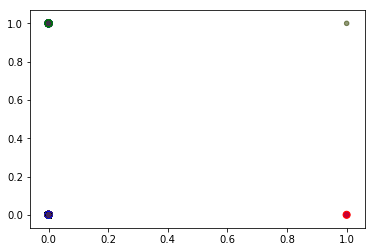

In [42]:
# Plots for Naive Bayes model

from sklearn import cross_validation
#from matplotlib.colors import ListedColorMap

#model_NaiveBayes_CV = cross_validation.cross_val_score(model_NB,X_train,Y_train,cv=5)
#model_NaiveBayes_CV
#plt.title('Naive Bayes model')
#plt.plot(model_NaiveBayes_CV,"p")
#plt.xlabel('X values')
#plt.ylabel('Probabilities')
#plt.legend()
#plt.show()

x=np.array(X_train)
y=np.array(Y_train)
x_test = np.array(X_test)
y_test = np.array(Y_test)
y_test[y_test=='I'] = 0
y_test[y_test=='A'] = 1

y[y=='I'] = 0
y[y=='A'] = 1

preds_NB=np.array(predictions_NB)
preds_NB[preds_NB=='I'] = 0
preds_NB[preds_NB=='A'] = 1

colors = ['R','G','B']
plt.scatter(x[:,0],y,c=colors, s=50,cmap='RdBu')
lim = plt.axis()
plt.scatter(y_test,preds_NB,c=colors,s=20,cmap='RdBu', alpha=0.1)
plt.axis(lim)





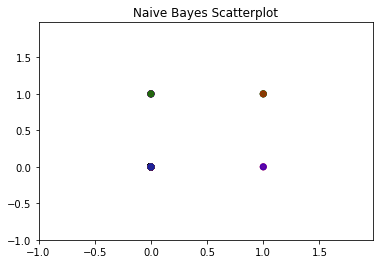

In [43]:
h = 0.02

x_min,x_max = x_test[:,0].min() - 1,x_test[:,0].max() + 1
y_min,y_max = x_test[:,1].min() - 1,x_test[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

plt.scatter(y_test,preds_NB,c=colors, alpha = 0.5)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Naive Bayes Scatterplot')
plt.show()

In [44]:
# Using PCA on the Train set

from sklearn import decomposition
from sklearn.decomposition import PCA


PCA = PCA(n_components = 100)

X = X_train
Y = Y_train

pca = PCA.fit(X)




In [45]:
#x_train = np.array(X_train)
#type(X_train)
#Y_train.shape

#Y_train
#type(Y_train)
#Y_train
#print(X_train.shape)
#print(Y_train.shape)
X_train.columns
Y_train

,activity
198,I
460,I
159,I
961,I
1641,A
1194,I
1589,A
83,I
628,I
1386,I


In [46]:
# Logistic Regression model

from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()



In [47]:
logit_model.fit(X_train,Y_train)

C:\Users\suneelnair1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# Train and test predictions

train_predictions = logit_model.predict(X_train)
test_predictions = logit_model.predict(X_test)

In [52]:
# Metrics for the Logistic Regression model

print('\nClassification Report:\n',classification_report(Y_tfest,test_predictions))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,test_predictions))

print('\n Accuracy: ', accuracy_score(Y_test,test_predictions))


Classification Report:
              precision    recall  f1-score   support

          A       1.00      0.54      0.70        13
          I       0.99      1.00      0.99       560

avg / total       0.99      0.99      0.99       573


Confusion Matrix:
 [[  7   6]
 [  0 560]]

 Accuracy:  0.989528795812


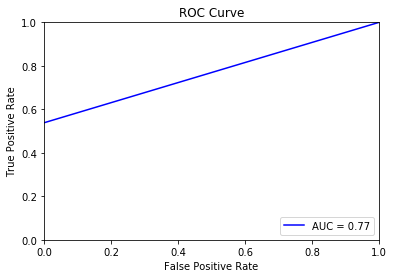

AUC: 0.769230769231


In [72]:
# ROC Curve for Logistic Regression model

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_test = np.array(Y_test)
y_test[y_test=='I'] = 0
y_test[y_test=='A'] = 1


preds = np.array(test_predictions)
preds[preds=='I'] = 0
preds[preds=='A'] = 1

fpr,tpr,thresholds = metrics.roc_curve(y_test,preds)
 
roc_auc = metrics.auc(fpr,tpr)
 
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC:',roc_auc)




In [28]:
#X_test.describe
#X_train.describe
#X_test.shape
#Y_test.shape
#X_train.drop(['activity'],axis =1, inplace = True)
#X_test.drop(['activity'],axis =1, inplace = True)
#X_train.shape
#X_test.shape
#Y_train.shape
#type(Y_train)

<bound method NDFrame.describe of       f1  f2  f3  f4  f5  f6  f7  f8  f9  f10   ...     f139341  f139342  \
198    0   0   0   0   0   0   0   0   0    0   ...           0        0   
460    0   0   0   0   0   0   0   0   0    0   ...           0        0   
159    0   0   0   0   0   0   0   0   0    0   ...           0        0   
961    0   0   0   0   0   0   0   0   0    0   ...           0        0   
1641   0   0   0   0   0   0   0   0   0    0   ...           0        1   
1194   0   0   0   0   0   0   0   0   0    0   ...           0        0   
1589   0   0   0   0   0   0   0   0   0    0   ...           0        0   
83     0   0   0   0   0   0   0   0   0    0   ...           0        0   
628    0   0   0   0   0   0   0   0   0    0   ...           0        0   
1386   0   0   0   0   0   0   0   0   0    0   ...           0        0   
1457   0   0   0   0   0   0   0   0   0    0   ...           0        0   
948    0   0   0   0   0   0   0   0   0    0   ...   

In [32]:
# Neural Network model for classification

from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam

opt=Adam(lr=0.1)

# Build model
 
model = Sequential()
model.add(Dense(12, activation='relu',input_shape=(139350,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
 
# Compile model
 
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])


X = np.array(X_train)
Y = np.array(Y_train)

Y[Y=='I'] = 0
Y[Y=='A'] = 1

hist=model.fit(X,Y,epochs = 5, batch_size=10, verbose=1)


Epoch 1/5
1335/1335 [==============================] - 21s - loss: 0.3562 - acc: 0.9768    - ETA: 8s -  - ETA: 2s - loss: 0.3
Epoch 2/5
1335/1335 [==============================] - 8s - loss: 0.3501 - acc: 0.9783     
Epoch 3/5
1335/1335 [==============================] - 8s - loss: 0.3501 - acc: 0.9783     
Epoch 4/5
1335/1335 [==============================] - 8s - loss: 0.3501 - acc: 0.9783     
Epoch 5/5
1335/1335 [==============================] - 7s - loss: 0.3501 - acc: 0.9783     


In [30]:
score,acc=model.evaluate(X,Y)
print('\nTrain score',score)
print('\nTrain accuracy',acc)

1335/1335 [==============================] - 4s     

Train score 0.35013098138

Train accuracy 0.978277153737


In [31]:
x_test=np.array(X_test)
y_test=np.array(Y_test)

y_test[y_test=='I'] = 0
y_test[y_test=='A'] = 1

test_score,test_acc=model.evaluate(x_test,y_test)
print('\Test score',test_score)
print('\Test accuracy',test_acc)

573/573 [==============================] - 2s     
\Test score 0.365681114877
\Test accuracy 0.977312390925


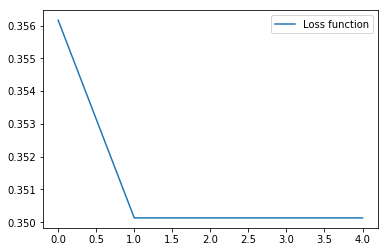

In [34]:
# Plotting the Loss function

plt.plot(hist.history['loss'],label='Loss function')
plt.legend()
plt.show()